# COVID Testing and Vaccines and Health Equity 

#### **Analysis Goal**
Corona, New York was one of the zip codes ([11368](https://goo.gl/maps/wCcrT4X5FKj79vES7)) with [very high cases](https://www1.nyc.gov/site/doh/covid/covid-19-data-neighborhoods.page) of COVID-19. Its residents are mostly Hispanic and [low-income](https://censusreporter.org/profiles/86000US11368-11368/), which this analysis uses as a proxy for essential workers during the coronavirus pandemic.<br/>

The New York City Department of Health and Mental Hygiene (NYCDOH) has [mobile testing units](https://www1.nyc.gov/site/coronavirus/get-tested/covid-19-testing.page) which often set up near subway stations. However, the testing units operate during peak hours (8 AM - 8 PM), and off-peak commuters cannot access these services. The results of this analysis could provide NYCDOH with evidence to deploy units during off-peak hours to stations in zip codes with high numbers of essential workers. 

#### **Process**
This analysis explores April 20219, off-peak travel on the 7 train (12 AM - 4 AM) from the 103rd Street-Corona station, in the Corona neighborhood in Queens. MTA turnstile data for 2020 and 2021 is irregular because the MTA suspended 24-hour subway service from [May 2020](https://www.nytimes.com/2020/05/06/nyregion/nyc-subway-close-coronavirus.html) until [May 2021](https://www.nytimes.com/2021/05/17/nyregion/nyc-subway-full-service-24-hours.html). Therefore, the best approximation for off-hour travel was the 2019 data used here. 

#### **Preliminary visualization**
The two barplots show how many people entered the Corona station each day in April during the midnight and 4 AM turnstile report.   

#### **Preliminary conclusions**
The barplots show regular off-peak travel and suggest some days of the week may be the best option for stationing mobile testing units late at night. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from April 2019, data is loaded on Saturdays.
# Source: http://web.mta.info/developers/turnstile.html

def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)

# Create a datetime column using data from columns DATE and TIME during import

week_nums = [190406, 190413, 190420, 190427, 190504]
turnstiles_df = get_data_parse_dt(week_nums)
turnstiles_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-03-30 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,00:00:00,REGULAR,6999064,2373568
1,2019-03-30 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,04:00:00,REGULAR,6999084,2373576
2,2019-03-30 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,08:00:00,REGULAR,6999107,2373622
3,2019-03-30 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,12:00:00,REGULAR,6999214,2373710
4,2019-03-30 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,16:00:00,REGULAR,6999451,2373781


In [3]:
turnstiles_df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [4]:
# Strip whitespace from column names

turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [5]:
# Drop columns: EXIT, DESC, and DIVISION, and LINENAME
# To prevent errors in multiple run of cell, errors on drop is ignored

turnstiles_df = turnstiles_df.drop(['EXITS', 'DESC', 'DIVISION', 'LINENAME'], axis=1, errors="ignore")
turnstiles_df.head(20) 

,DATE_TIME,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,2019-03-30 00:00:00,A002,R051,02-00-00,59 ST,03/30/2019,00:00:00,6999064
1,2019-03-30 04:00:00,A002,R051,02-00-00,59 ST,03/30/2019,04:00:00,6999084
2,2019-03-30 08:00:00,A002,R051,02-00-00,59 ST,03/30/2019,08:00:00,6999107
3,2019-03-30 12:00:00,A002,R051,02-00-00,59 ST,03/30/2019,12:00:00,6999214
4,2019-03-30 16:00:00,A002,R051,02-00-00,59 ST,03/30/2019,16:00:00,6999451
5,2019-03-30 20:00:00,A002,R051,02-00-00,59 ST,03/30/2019,20:00:00,6999796
6,2019-03-31 00:00:00,A002,R051,02-00-00,59 ST,03/31/2019,00:00:00,6999957
7,2019-03-31 04:00:00,A002,R051,02-00-00,59 ST,03/31/2019,04:00:00,6999983
8,2019-03-31 08:00:00,A002,R051,02-00-00,59 ST,03/31/2019,08:00:00,6999998
9,2019-03-31 12:00:00,A002,R051,02-00-00,59 ST,03/31/2019,12:00:00,7000069


In [6]:
# Looking for the Corona station name, it's '103 ST-CORONA'. 

df = turnstiles_df[turnstiles_df['STATION'].str.contains('CORONA', na=False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 186603 to 190111
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE_TIME  1926 non-null   datetime64[ns]
 1   C/A        1926 non-null   object        
 2   UNIT       1926 non-null   object        
 3   SCP        1926 non-null   object        
 4   STATION    1926 non-null   object        
 5   DATE       1926 non-null   object        
 6   TIME       1926 non-null   object        
 7   ENTRIES    1926 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 135.4+ KB


In [7]:
# Head and tail have rows from end of March and begining of May. 
# Drop by index rows not in April

df = df.drop(range(186603,186615), axis=0, errors='ignore')
df = df.drop(range(190093,190112), axis=0, errors='ignore')

df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
186615,2019-04-01 00:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,00:00:00,15514614
186616,2019-04-01 04:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,04:00:00,15514631
186617,2019-04-01 08:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,08:00:00,15515354
186618,2019-04-01 12:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,12:00:00,15515885
186619,2019-04-01 16:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,16:00:00,15516178


In [8]:
# Create dataframe with Corona station as a deep copy to avoid errors later on. 

corona_df = df.copy(deep=True)
corona_df

,DATE_TIME,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
186615,2019-04-01 00:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,00:00:00,15514614
186616,2019-04-01 04:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,04:00:00,15514631
186617,2019-04-01 08:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,08:00:00,15515354
186618,2019-04-01 12:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,12:00:00,15515885
186619,2019-04-01 16:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,16:00:00,15516178
...,...,...,...,...,...,...,...,...
190088,2019-04-30 04:00:00,R529,R208,00-06-01,103 ST-CORONA,04/30/2019,04:00:00,4562280
190089,2019-04-30 08:00:00,R529,R208,00-06-01,103 ST-CORONA,04/30/2019,08:00:00,4562931
190090,2019-04-30 12:00:00,R529,R208,00-06-01,103 ST-CORONA,04/30/2019,12:00:00,4563416
190091,2019-04-30 16:00:00,R529,R208,00-06-01,103 ST-CORONA,04/30/2019,16:00:00,4563625


In [9]:
# Create copy of dataframe with the Corona station data to perform groupby and keep it separate from corona_df. 

corona_daily = corona_df.copy()

In [10]:
# Create new columns for the previous date and entries. 
# Apply a shift to calculate the previous day's entries. 

corona_daily[["PREV_DATE", "PREV_ENTRIES"]] = (corona_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-10-6d29a048bba3>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corona_daily[["PREV_DATE", "PREV_ENTRIES"]] = (corona_daily


In [11]:
# Create counter function to pass to dataframe to create daily entries. 

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

corona_daily["DAILY_ENTRIES"] = corona_daily.apply(get_daily_counts, axis=1, max_counter=1000000)
corona_daily

,DATE_TIME,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
186615,2019-04-01 00:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,00:00:00,15514614,NaN,NaN,NaN
186616,2019-04-01 04:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,04:00:00,15514631,04/01/2019,15514614.0,17.0
186617,2019-04-01 08:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,08:00:00,15515354,04/01/2019,15514631.0,723.0
186618,2019-04-01 12:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,12:00:00,15515885,04/01/2019,15515354.0,531.0
186619,2019-04-01 16:00:00,R529,R208,00-00-00,103 ST-CORONA,04/01/2019,16:00:00,15516178,04/01/2019,15515885.0,293.0
...,...,...,...,...,...,...,...,...,...,...,...
190088,2019-04-30 04:00:00,R529,R208,00-06-01,103 ST-CORONA,04/30/2019,04:00:00,4562280,04/30/2019,4562274.0,6.0
190089,2019-04-30 08:00:00,R529,R208,00-06-01,103 ST-CORONA,04/30/2019,08:00:00,4562931,04/30/2019,4562280.0,651.0
190090,2019-04-30 12:00:00,R529,R208,00-06-01,103 ST-CORONA,04/30/2019,12:00:00,4563416,04/30/2019,4562931.0,485.0
190091,2019-04-30 16:00:00,R529,R208,00-06-01,103 ST-CORONA,04/30/2019,16:00:00,4563625,04/30/2019,4563416.0,209.0


In [12]:
# Create timeseries

corona_daily = corona_daily.groupby(["DATE", "TIME"])[['DAILY_ENTRIES']].sum().reset_index()
corona_daily

,DATE,TIME,DAILY_ENTRIES
0,03/30/2019,00:00:00,0.0
1,03/30/2019,04:00:00,207.0
2,03/30/2019,08:00:00,2763.0
3,03/30/2019,12:00:00,3282.0
4,03/30/2019,16:00:00,2911.0
...,...,...,...
209,05/03/2019,04:00:00,195.0
210,05/03/2019,08:00:00,6928.0
211,05/03/2019,12:00:00,5093.0
212,05/03/2019,16:00:00,3003.0


In [13]:
# Create mask for rows reporting at midnight

midnight_mask = (corona_daily['TIME'] == '00:00:00')

corona_midnight = corona_daily[midnight_mask]
corona_midnight.head()

,DATE,TIME,DAILY_ENTRIES
0,03/30/2019,00:00:00,0.0
6,03/31/2019,00:00:00,1005.0
12,04/01/2019,00:00:00,728.0
18,04/02/2019,00:00:00,959.0
24,04/03/2019,00:00:00,881.0


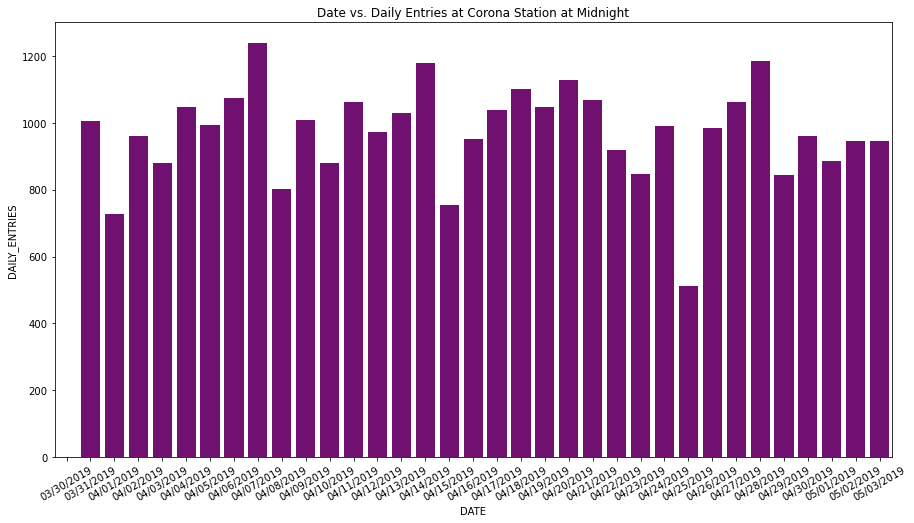

In [14]:
# Plot date vs. daily entries at midnight

plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'DATE', y = 'DAILY_ENTRIES',data = corona_midnight, color='purple')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(title='Date vs. Daily Entries at Corona Station at Midnight');


In [15]:
# Create mask for rows reporting at 4 AM

four_am_mask = (corona_daily['TIME'] == '04:00:00')

corona_four_am = corona_daily[four_am_mask]
corona_four_am.head()

,DATE,TIME,DAILY_ENTRIES
1,03/30/2019,04:00:00,207.0
7,03/31/2019,04:00:00,218.0
13,04/01/2019,04:00:00,202.0
19,04/02/2019,04:00:00,172.0
25,04/03/2019,04:00:00,214.0


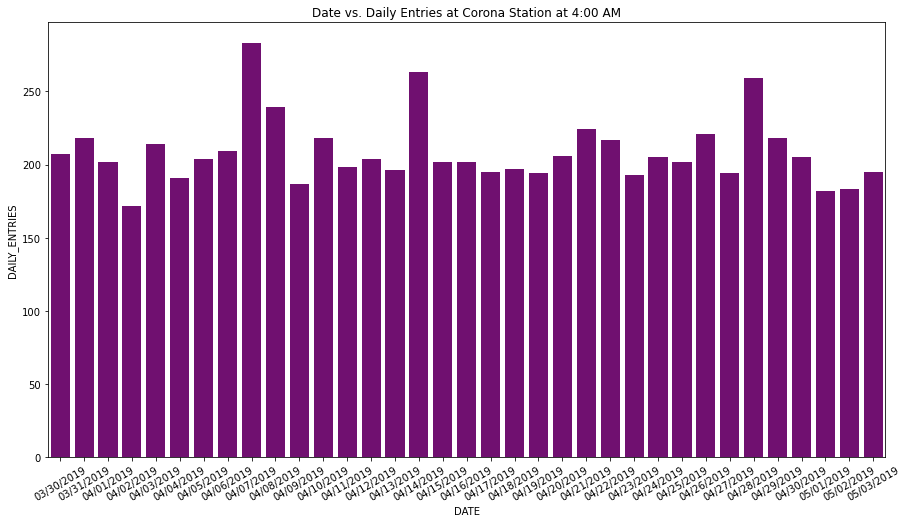

In [16]:
# Plot date vs. daily entries at 4 AM 

plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'DATE', y = 'DAILY_ENTRIES',data = corona_four_am, color='purple')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(title='Date vs. Daily Entries at Corona Station at 4:00 AM');

In [ ]:
# Convert dates to day of week for all turnstiles at 59th Street

fifty_ninth_turnstiles['WEEK_DAY'] = pd.to_datetime(
    fifty_ninth_turnstiles['DATE'])\
    .dt.weekday

fifty_ninth_turnstiles.head(2)


In [ ]:
# # Plot results
# week_day.plot(x="WEEK_DAY", y="DAILY_ENTRIES");

In [ ]:
# Plot weekly data from all turnstiles at 59th Street

# week_day = (
#     fifty_ninth_turnstiles
#     .groupby('WEEK_DAY')
#     .sum()
#     .reset_index()
# )
# week_day